<a href="https://colab.research.google.com/github/TitanLeonov/Leonov_Alexander_PI3-1b_computer_math_/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%967_%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0_SymPy_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №7. Библиотека SymPy

In [2]:
import sympy as sym

### Задание №1. Создание выражения

#### Создайте выражение:

$$f = x e^{-x} + x (1-x)$$

#### Затем вычислите его для

$$x = 0, 0.1, 0.2, 0.4, 0.8$$

- Выведите выражение:

In [ ]:
x = sym.symbols('x')

f = x * sym.exp(-x) + x*(1 - x)
f

x*(1 - x) + x*exp(-x)

- Выведите ответ:

In [ ]:
vals = [0, 0.1, 0.2, 0.4, 0.8]

for i in range(len(vals)):
  result = f.subs({x: vals[i]})
  print(f'При x = {vals[i]}, f = {result}')

При x = 0, f = 0
При x = 0.1, f = 0.180483741803596
При x = 0.2, f = 0.323746150615596
При x = 0.4, f = 0.508128018414256
При x = 0.8, f = 0.519463171293777


### Задание №2. Факторизация* полинома и нахождение его корней

#### Факторизуйте:

$$x^{4} - 6 x^{3} + x^{2} + 24 x + 16$$

#### Затем найдите его нули.

**Факторизация многочлена — представление многочлена в виде произведения многочленов меньших степеней.*

- Выведите выражение:

In [ ]:
import sympy as sym

x = sym.symbols('x')

polynomial = x**4 - 6*x**3 + x**2 + 24*x + 16

polynomial

x**4 - 6*x**3 + x**2 + 24*x + 16

- Факторизуйте полином и выведите результат факторизации:

In [ ]:
factored_polynomial = sym.factor(polynomial)

factored_polynomial

(x - 4)**2*(x + 1)**2

> Создадим символьное представление уравнения. В данном случае, `sp.Eq(polynomial, factored_polynomial)` создает уравнение, которое показывает равенство между исходным полиномом и его факторизованным видом.
>
>
> Это удобно использовать для демонстрации шагов решения или преобразования математических выражений.

In [ ]:
equation = sym.Eq(polynomial, factored_polynomial)
equation

Eq(x**4 - 6*x**3 + x**2 + 24*x + 16, (x - 4)**2*(x + 1)**2)

- Найдите корни полинома и выведите их:

In [ ]:
solution = sym.solve(polynomial, x)
print('Корни полинома:', solution)

Корни полинома: [-1, 4]


### Задание №3. Интегрирование и дифференцирование

#### Интегрируйте функцию:

$$f = \sin(x) e^{-x}$$

#### Затем продифференцируйте результат, чтобы увидеть, получите ли вы исходную функцию.

- Интегрируйте функцию и выведите результат:

In [ ]:
# Ваш код

-exp(-x)*sin(x)/2 - exp(-x)*cos(x)/2

In [3]:
x = sym.symbols('x')

f = sym.sin(x) * sym.exp(-x)

integral_f = sym.integrate(f)
integral_f

-exp(-x)*sin(x)/2 - exp(-x)*cos(x)/2

- Продифференцируйте результат и выведите его:

In [ ]:
# Ваш код

exp(-x)*sin(x)

In [4]:
diff_integral_f = sym.diff(integral_f, x)

diff_integral_f

exp(-x)*sin(x)

In [ ]:
print(f'Интеграл функции: {integral_f}')
print(f'Производная интеграла: {diff_integral_f}')

Интеграл функции: -exp(-x)*sin(x)/2 - exp(-x)*cos(x)/2
Производная интеграла: exp(-x)*sin(x)


### Задание №4. Парсинг выражения

#### Напишите функцию, которая считывает математическое выражение в виде строки (например, `"sin(2*pi*x)"`), преобразует его в выражение SymPy, а затем вычисляет его на указанном диапазоне значений.

#### Пусть ваша программа либо создает график введенной функции, либо использует входную функцию в качестве функции для подгонки набора данных с использованием curvefit.

- Подсказка: `parse_expr()` преобразует строку в выражение SymPy.

#### Пример:

In [ ]:
from sympy.parsing.sympy_parser import parse_expr

In [ ]:
s = "sin(2*pi*x)"
a = parse_expr(s)
a

sin(2*pi*x)

> `sympy.lambdify()` преобразует выражение SymPy в функцию, которую можно вызвать с помощью python. Вы также можете сделать ее совместимой с numpy (это означает, например, что любой `sin()` в вашем выражении SymPy будет вычислен с использованием `np.sin()`)

In [ ]:
f = sp.lambdify(x, a, "numpy")

In [ ]:
f(1.0)

-2.4492935982947064e-16

#### 4.1. Постройте график этой функции с помощью matplotlib:

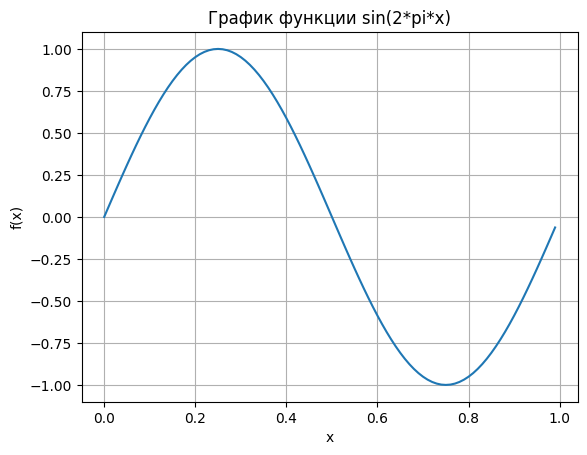

In [9]:
import numpy as np
import matplotlib.pyplot as plt


x_values = np.arange(0, 1, 0.01)

y_values = np.sin(2 * np.pi * x_values)

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции sin(2*pi*x)')
plt.grid(True)
plt.show()

#### 4.2. Напишите функцию, которая принимает на вход четыре параметра: expr_str, x_start, x_end и num_points. Если эти параметры не предоставлены при вызове функции (т.е. они равны None), функция запрашивает соответствующие значения у пользователя. Если параметры предоставлены, функция использует их для построения графика.

  - Значения параметров:

    - `expr_str`: Это строка, которая представляет математическое выражение, которое нужно визуализировать. Например, `"sin(2*pi*x)"`. Это выражение затем преобразуется в выражение SymPy, которое можно использовать для дальнейших вычислений.

    - `x_start`: Это начальное значение `x` для диапазона значений `x`, используемых при построении графика. Например, если `x_start = 0`, то график будет начинаться с `x = 0`.

    - `x_end`: Это конечное значение `x` для диапазона значений `x`, используемых при построении графика. Например, если `x_end = 1`, то график будет заканчиваться на `x = 1`.

    - `num_points`: Это количество точек, которые будут использоваться при построении графика. Например, если `num_points = 400`, то график будет состоять из 400 точек, равномерно распределенных между `x_start` и `x_end`.

Введите математическое выражение: sin(x)**(1/3)
Введите начальное значение x: -100
Введите конечное значение x: 100
Введите количество точек: 400


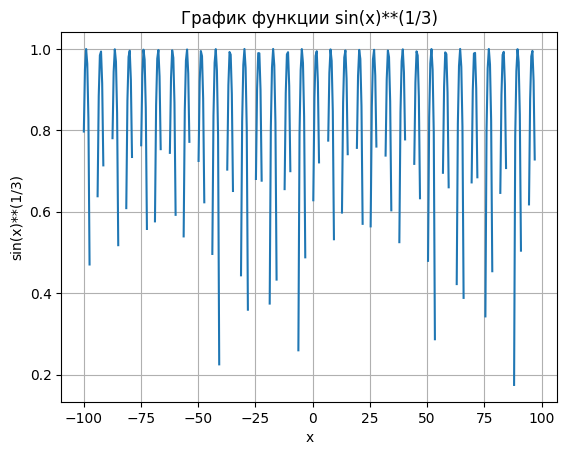

In [13]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def plot_expression(expr_str=None, x_start=None, x_end=None, num_points=None):
    if expr_str is None:
        expr_str = input("Введите математическое выражение: ")
    if x_start is None:
        x_start = float(input("Введите начальное значение x: "))
    if x_end is None:
        x_end = float(input("Введите конечное значение x: "))
    if num_points is None:
        num_points = int(input("Введите количество точек: "))

    x = sp.symbols('x')
    expr = sp.sympify(expr_str)

    x_values = np.linspace(x_start, x_end, num_points)

    y_values = []
    for val in x_values:
        try:
            y_values.append(float(expr.subs(x, val)))
        except TypeError:
            y_values.append(np.nan)

    plt.plot(x_values, y_values)
    plt.xlabel('x')
    plt.ylabel(expr_str)
    plt.title(f'График функции {expr_str}')
    plt.grid(True)
    plt.show()


plot_expression()



Введите математическое выражение: sin(x)**(1/3)
Введите начальное значение x: -100
Введите конечное значение x: 100
Введите количество точек для графика: 400


<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in power
  return (sin(x)**(1/3))


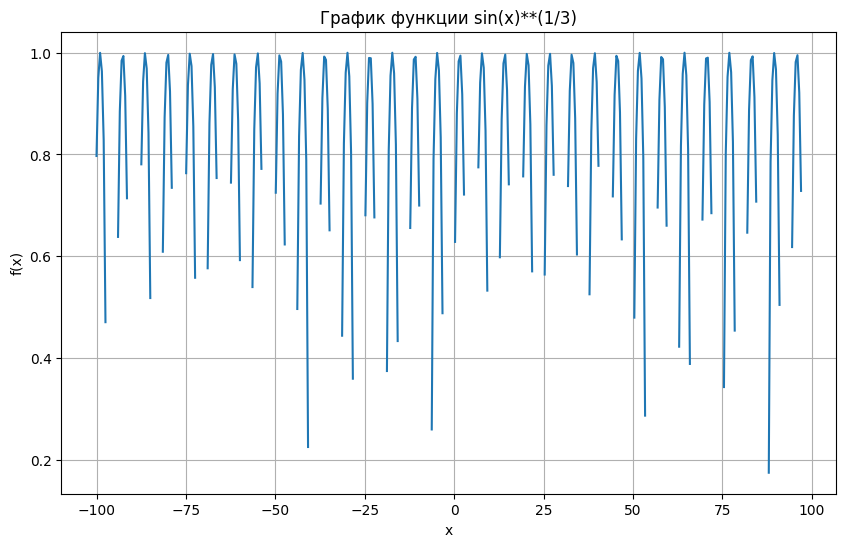

In [ ]:
# Ваш код

### Задание №5. Работа с физическими единицами измерения

SymPy позволяет работать с физическими единицами измерения. Подробнее об этом можно прочитать в документации SymPy:

http://docs.sympy.org/latest/modules/physics/units/quantities.html

Давайте попробуем это на практике. Второй закон Ньютона гласит:



$$F = ma$$



Создайте величину массы равную 1 кг и величину ускорения равную 10 м/с$^2$ , затем вычислите силу, $F$ (используя предопределенные единицы измерения kilograms, meters, seconds, newtons), и выразите результат в Ньютонах, используя метод convert_to.

In [14]:
from sympy.physics.units import meters, seconds, newtons, kilograms
from sympy.physics.units import convert_to

mass = 1 * kilograms
acceleration = 10 * (meters/seconds**2)
F = mass * acceleration
convert_to(F, newtons)

10*newton

### Задание №6. Решение обыкновенных дифференциальных уравнений

Найдите решение следующего уравнения:

$$ \frac{dy}{dt} = \cos(t) - y^{1/n}, \qquad y(0) = 2, $$

где $n > 1$ - целое число. Это небольшое изменение относительно предыдущих примеров означает, что `sympy` может представить решение только в виде степенного ряда.

#### 6.1. Найдите общее решение в виде степенного ряда для $n = 3$.

- Определите дифференциальное уравнение и отобразите его:

In [ ]:
# Ваш код

y(t)**0.333333333333333 - cos(t) + Derivative(y(t), t)

In [15]:
t = sp.symbols('t')
y = sp.Function('y')(t)
diff = y.diff(t) - sp.cos(t) + y**(1/3)

diff

y(t)**0.333333333333333 - cos(t) + Derivative(y(t), t)

- Отобразите общее решение дифференциального уравнения для $n = 3$ в виде степенного ряда:

In [ ]:
# Ваш код

Общее решение в виде степенного ряда для n = 3:


Eq(y(t), t*(1 - C1**0.333333333333333) + t**3*((1 - C1**0.333333333333333)*(0.222222222222222*C1**(-1.66666666666667)*(1 - C1**0.333333333333333) + 0.111111111111111*C1**(-1.33333333333333)) - 1)/6 + t**4*(0.333333333333333*C1**(-0.666666666666667) + (1 - C1**0.333333333333333)*(-0.333333333333333*C1**(-0.666666666666667)*(0.222222222222222*C1**(-1.66666666666667)*(1 - C1**0.333333333333333) + 0.111111111111111*C1**(-1.33333333333333)) + (1 - C1**0.333333333333333)*(-0.37037037037037*C1**(-2.66666666666667)*(1 - C1**0.333333333333333) - 0.222222222222222*C1**(-2.33333333333333))))/24 + t**5*(-0.666666666666667*C1**(-1.66666666666667)*(1 - C1**0.333333333333333) - 0.111111111111111*C1**(-1.33333333333333) + (1 - C1**0.333333333333333)*(-0.222222222222222*C1**(-1.66666666666667) - 0.333333333333333*C1**(-0.666666666666667)*(-0.333333333333333*C1**(-0.666666666666667)*(0.222222222222222*C1**(-1.66666666666667)*(1 - C1**0.333333333333333) + 0.111111111111111*C1**(-1.33333333333333)) + (1 -

In [16]:
series_solution_n3 = sp.dsolve(diff, y, hint='1st_power_series', x0=0, n=6)
series_solution_n3

Eq(y(t), t*(1 - C1**0.333333333333333) + t**3*((1 - C1**0.333333333333333)*(0.222222222222222*(1 - C1**0.333333333333333)/C1**1.66666666666667 + 0.111111111111111/C1**1.33333333333333) - 1)/6 + t**4*(0.333333333333333/C1**0.666666666666667 + (1 - C1**0.333333333333333)*(-0.333333333333333*(0.222222222222222*(1 - C1**0.333333333333333)/C1**1.66666666666667 + 0.111111111111111/C1**1.33333333333333)/C1**0.666666666666667 + (1 - C1**0.333333333333333)*(-0.37037037037037*(1 - C1**0.333333333333333)/C1**2.66666666666667 - 0.222222222222222/C1**2.33333333333333)))/24 + t**5*(-0.666666666666667*(1 - C1**0.333333333333333)/C1**1.66666666666667 - 0.111111111111111/C1**1.33333333333333 + (1 - C1**0.333333333333333)*(-0.222222222222222/C1**1.66666666666667 - 0.333333333333333*(-0.333333333333333*(0.222222222222222*(1 - C1**0.333333333333333)/C1**1.66666666666667 + 0.111111111111111/C1**1.33333333333333)/C1**0.666666666666667 + (1 - C1**0.333333333333333)*(-0.37037037037037*(1 - C1**0.3333333333333

#### 6.2. Изучив [документацию](https://docs.sympy.org/latest/modules/solvers/ode.html) (метод `dsolve`), укажите начальное условие $y(0) = 2$ с помощью параметра `ics`. Используя данное условие, найдите решения ОДУ для $n = 3, \dots, 10$.

In [ ]:
# Ваш код

Решение для n = 3:


Eq(y(t), 2 - 0.259921049894873*t + 0.0272900001727772*t**2 - 0.167788708593124*t**3 + 0.00872690909335191*t**4 + 0.00857477013656389*t**5 + O(t**6))

Решение для n = 4:


Eq(y(t), 2 - 0.189207115002721*t + 0.0140629029606484*t**2 - 0.167030887515215*t**3 + 0.00618400752000714*t**4 + 0.0085011856656446*t**5 + O(t**6))

Решение для n = 5:


Eq(y(t), 2 - 0.148698354997035*t + 0.00854047778879297*t**2 - 0.166824353759818*t**3 + 0.00478184877283554*t**4 + 0.00845122695046389*t**5 + O(t**6))

Решение для n = 6:


Eq(y(t), 2 - 0.122462048309373*t + 0.00572745839939584*t**2 - 0.166747829812517*t**3 + 0.00389523542501292*t**4 + 0.00841955181737363*t**5 + O(t**6))

Решение для n = 7:


Eq(y(t), 2 - 0.104089513673812*t + 0.00410443359038082*t**2 - 0.166713530740684*t**3 + 0.00328476949521276*t**4 + 0.00839878736214259*t**5 + O(t**6))

Решение для n = 8:


Eq(y(t), 2 - 0.0905077326652577*t + 0.00308435569804573*t**2 - 0.166696029321922*t**3 + 0.00283914676202468*t**4 + 0.00838458837063094*t**5 + O(t**6))

Решение для n = 9:


Eq(y(t), 2 - 0.0800597388923061*t + 0.00240192501899473*t**2 - 0.166686219307222*t**3 + 0.00249968805439066*t**4 + 0.00837450098042692*t**5 + O(t**6))

Решение для n = 10:


Eq(y(t), 2 - 0.0717734625362931*t + 0.00192312231151855*t**2 - 0.166680314818901*t**3 + 0.00223256501781801*t**4 + 0.00836709725670678*t**5 + O(t**6))

In [17]:
numbers = [3, 4, 5, 6, 7, 8, 9, 10]

for s in numbers:
  print(f'Решение для n = {s}')
  solution = y.diff(t) - sp.cos(t) + y**(1/s)
  display(sp.dsolve(solution, y, hint='1st_power_series', ics={y.subs(t, 0): 2}))

Решение для n = 3


Eq(y(t), 2 - 0.259921049894873*t + 0.0272900001727772*t**2 - 0.167788708593124*t**3 + 0.00872690909335191*t**4 + 0.00857477013656389*t**5 + O(t**6))

Решение для n = 4


Eq(y(t), 2 - 0.189207115002721*t + 0.0140629029606484*t**2 - 0.167030887515215*t**3 + 0.00618400752000714*t**4 + 0.0085011856656446*t**5 + O(t**6))

Решение для n = 5


Eq(y(t), 2 - 0.148698354997035*t + 0.00854047778879297*t**2 - 0.166824353759818*t**3 + 0.00478184877283554*t**4 + 0.00845122695046389*t**5 + O(t**6))

Решение для n = 6


Eq(y(t), 2 - 0.122462048309373*t + 0.00572745839939584*t**2 - 0.166747829812517*t**3 + 0.00389523542501292*t**4 + 0.00841955181737363*t**5 + O(t**6))

Решение для n = 7


Eq(y(t), 2 - 0.104089513673812*t + 0.00410443359038082*t**2 - 0.166713530740684*t**3 + 0.00328476949521276*t**4 + 0.00839878736214259*t**5 + O(t**6))

Решение для n = 8


Eq(y(t), 2 - 0.0905077326652577*t + 0.00308435569804573*t**2 - 0.166696029321922*t**3 + 0.00283914676202468*t**4 + 0.00838458837063094*t**5 + O(t**6))

Решение для n = 9


Eq(y(t), 2 - 0.0800597388923061*t + 0.00240192501899473*t**2 - 0.166686219307222*t**3 + 0.00249968805439066*t**4 + 0.00837450098042692*t**5 + O(t**6))

Решение для n = 10


Eq(y(t), 2 - 0.0717734625362931*t + 0.00192312231151855*t**2 - 0.166680314818901*t**3 + 0.00223256501781801*t**4 + 0.00836709725670678*t**5 + O(t**6))

#### 6.3. Постройте график каждого из этих решений для $t \in [0, 1]$:

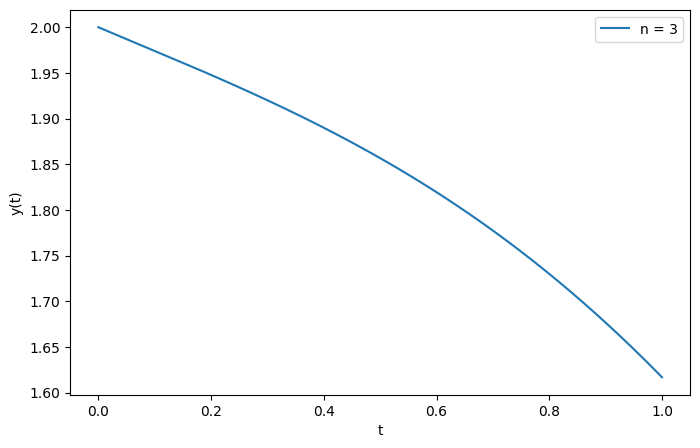

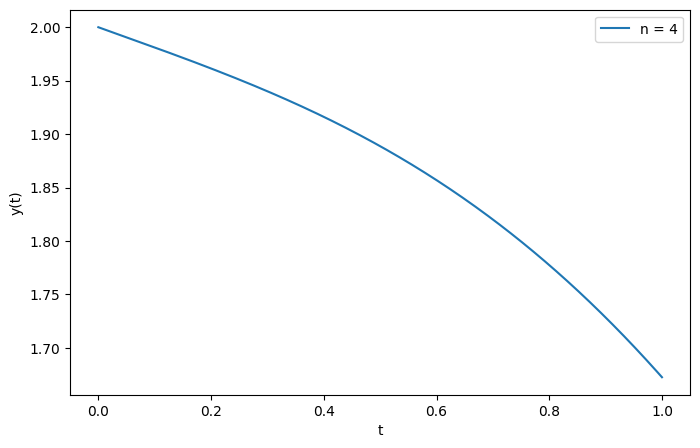

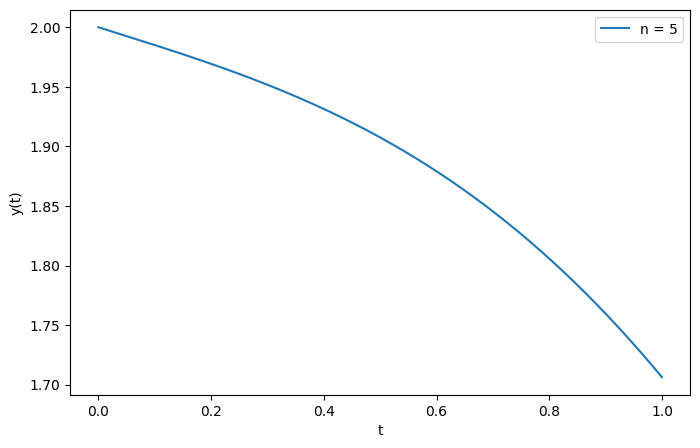

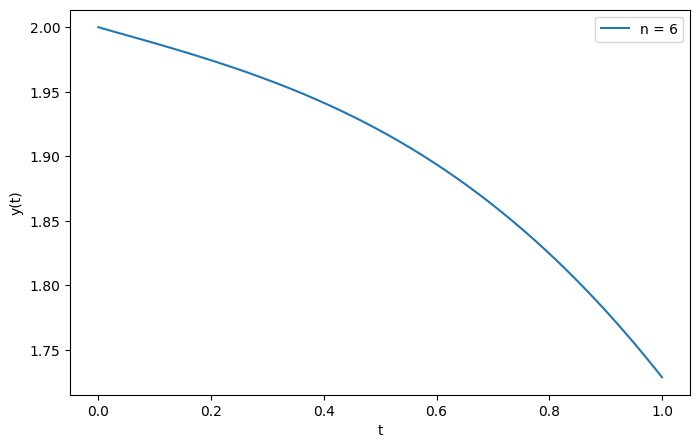

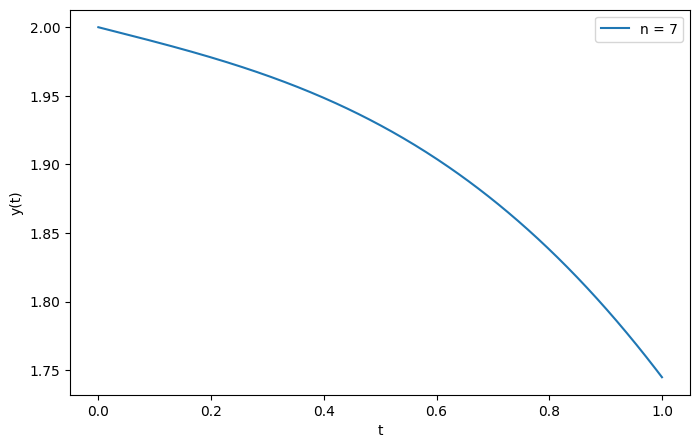

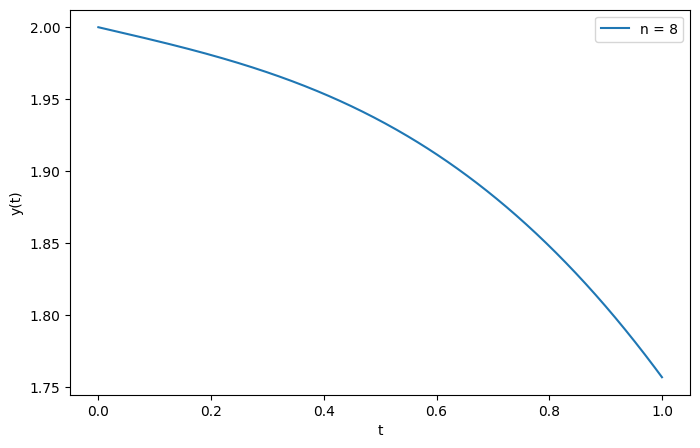

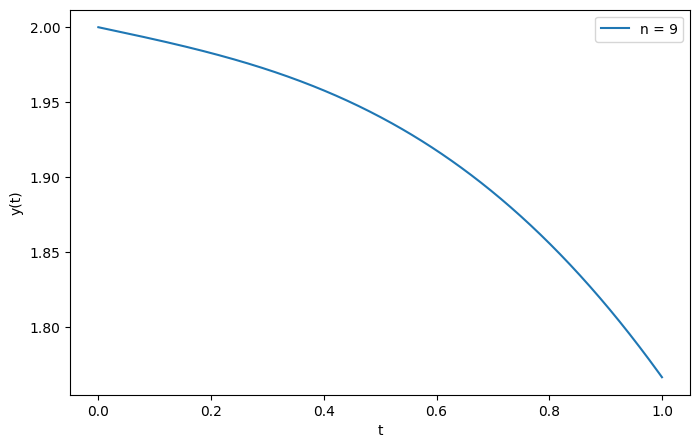

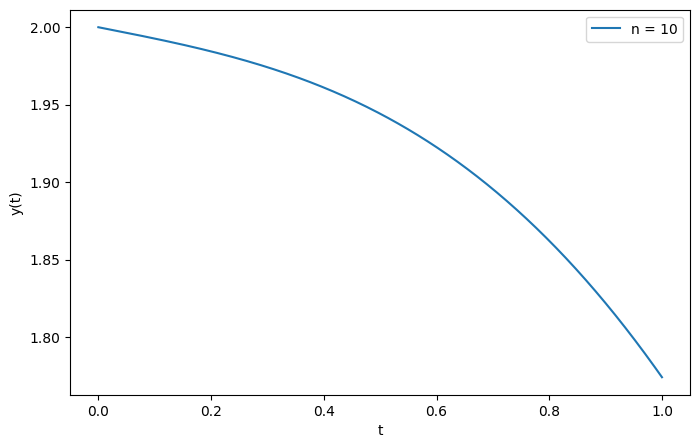

In [ ]:
# Ваш код

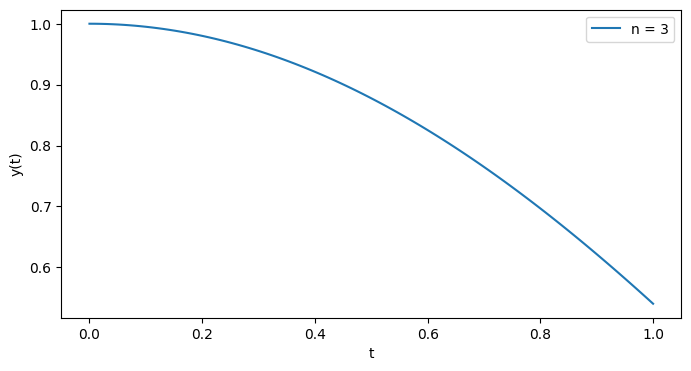

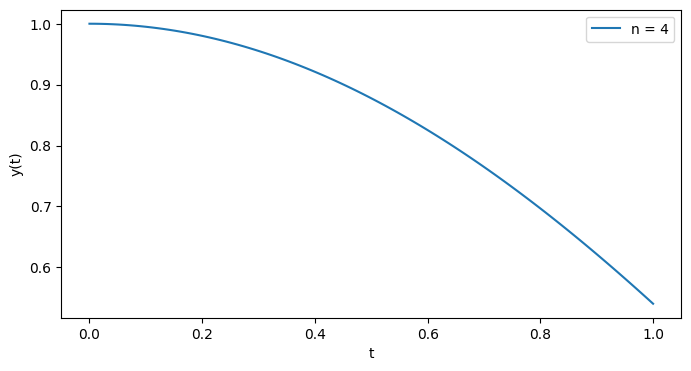

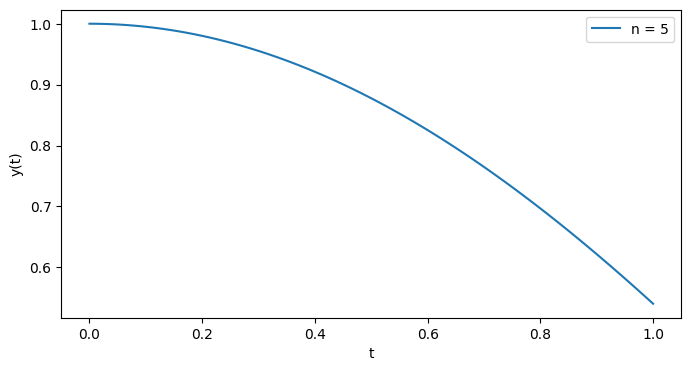

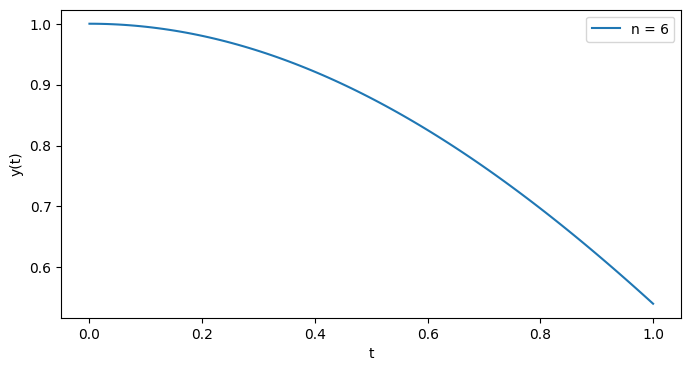

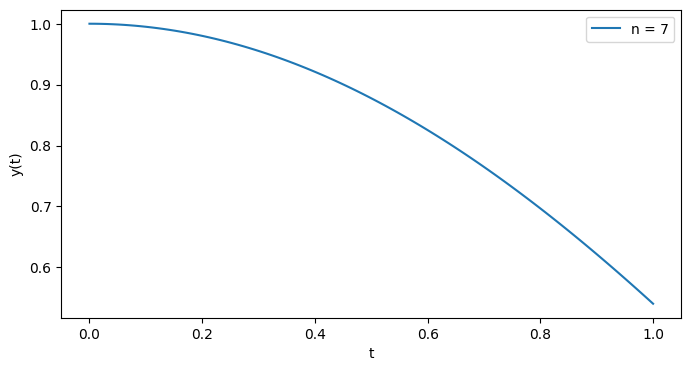

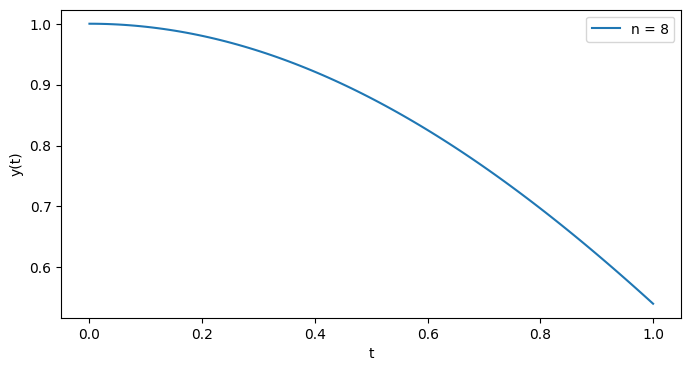

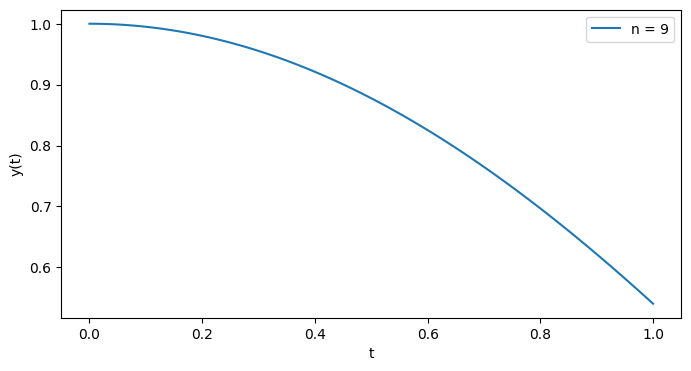

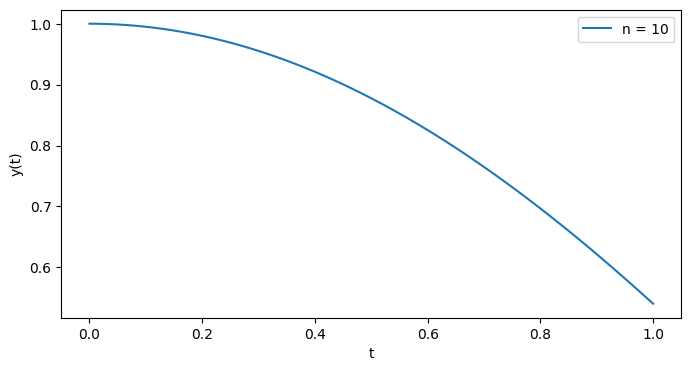

In [42]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

t, y, z = sp.symbols('t y z')

numbers = [3, 4, 5, 6, 7, 8, 9, 10]

solutions = []


for n in numbers:
    equation = sp.Eq(y.diff(t) - sp.cos(t) + z, 0)

    solution_z = sp.solve(equation, z)
    solution_y = [sp.Eq(y**(1/n), sol) for sol in solution_z]

    solutions.append((n, solution_y))

t_values = np.linspace(0, 1, 100)

for n, solution in solutions:
    y_func = sp.lambdify(t, solution[0].rhs.removeO(), "numpy")

    y_values = y_func(t_values)

    plt.figure(figsize=(8, 4))
    plt.plot(t_values, y_values, label=f'n = {n}')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.legend()
    plt.show()
